### TOPIC: Understanding Hedging
1. Create a portfolio of one stock and one put option and compare it to portoflio of only one stock.
2. We will compare the two portfolios on these: Distributions, Average portfolio value, Standard deviation, Value at Risk, Expected Shortfall, Max gains and Min losses.
3. We will be simulating stock prices under the assumptions of the Black-Scholes Model.
4. To simulate stock prices, we will use Monte Carlo Simulations.

### Simulating Stock prices

##### Imports 

In [641]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from scipy.stats import norm
from math import sqrt, log
%matplotlib inline
import seaborn as sns

##### Setting variables

In [642]:
Time_steps=365     #Number of time steps
dt=1/Time_steps     #Time step
mean=0.10          #Drift of GBM
Vol=0.3          #Difussion of GBM
S=S0= 10         #Initial stock price
M=100000       #Number of Monte Carlo simulations
K=14            #Strike rate
r=0.10             #Interest rate
t=0                 #Time at start
T=1            #Time at the end 

##### Function to simulate stock prices

In [643]:
def GBM_Euler(S0,M,Time_steps,mean,Vol):
    dt=1.0/Time_steps  #Time step
    sqrtdt=sqrt(dt)
    drift=mean*dt
    Stock_prices = np.zeros([Time_steps,M]) # array of shape Time_stepsxM
    Stock_prices[0,:]=S0
    W=np.zeros([Time_steps,M])
    for i in range(1,Time_steps):
        dW = norm.rvs(size=M) #Standard normal distribution
        W[i,:]=sqrtdt*dW
        Stock_prices[i,:]=Stock_prices[i-1,:]*(1.0+drift+Vol*sqrtdt*dW)
    Q=np.sum(W,0)
    return Stock_prices, Q  # M simulations of stock prices with Time size being Time_steps

##### Stock prices

In [644]:
start = time.time()
Stock_prices, Q = GBM_Euler(S0,M,Time_steps,r,Vol)  
St_last=Stock_prices[Time_steps-1,:] # M Last time-step prices
print("mean="+str(np.mean(St_last))+", std="+str(np.std(St_last)))  
elapsed_time_lc=(time.time()-start)
elapsed_time_lc

mean=11.057184787701729, std=3.3941778421164144


In [645]:
Stock_prices # Stock prices for 1000 time steps and 10000 MC simulations

array([[10.        , 10.        , 10.        , ..., 10.        ,
        10.        , 10.        ],
       [ 9.74597574, 10.15122122,  9.91151042, ..., 10.2557951 ,
        10.2379124 , 10.09731014],
       [ 9.77623894, 10.17884877,  9.76166049, ..., 10.23384183,
        10.16833023, 10.11969802],
       ...,
       [13.06104761, 12.22644815, 14.17297152, ...,  8.91200099,
         9.65811979, 11.6528377 ],
       [12.90350304, 12.31954914, 14.56349242, ...,  9.04029349,
         9.53864537, 11.65434518],
       [13.21889324, 12.38144334, 14.43081591, ...,  8.81410652,
         9.54600785, 11.73936429]])

In [646]:
Stock_prices.shape # Shape of the stock price matrix

In [647]:
St_last # Stock prices at the last (1000th) interval 

array([13.21889324, 12.38144334, 14.43081591, ...,  8.81410652,
        9.54600785, 11.73936429])

##### Visualize stock prices

mean=11.057184787701729, std=3.3941778421164144


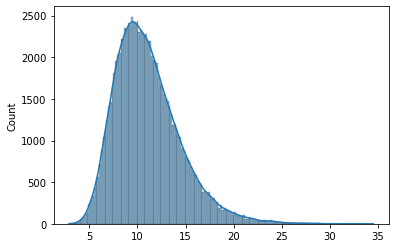

In [648]:
sns.histplot(St_last ,kde=True)
print("mean="+str(np.mean(St_last))+", std="+str(np.std(St_last)))

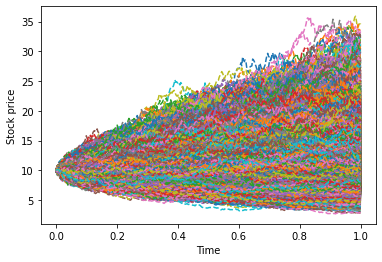

In [649]:
axes = plt.gca()
#axes.set_ylim(0,125)
plt.plot(np.linspace(0,1,Time_steps),Stock_prices,'--')

plt.xlabel('Time')
plt.ylabel('Stock price') 

plt.show()
#plt.savefig("Stock prices.png",dpi=300)

### Simulating Option prices 

In [751]:
# Option's value on last day Lastday 

In [752]:
def European_put_payoff(St_N,K): #European put pay off function
    if St_N<=K:
        return K-St_N
    elif St_N>K:
        return 0

In [753]:
Put_option_price_last_day = np.zeros([M]) 

In [754]:
for i in range(M):
    Put_option_price_last_day[i] = European_put_payoff(St_last[i],K)

<AxesSubplot:ylabel='Count'>

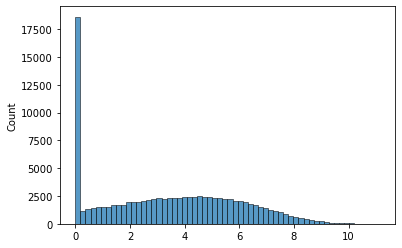

In [755]:
sns.histplot(Put_option_price_last_day) # Distribution of option price on last day

In [756]:
# Option price on first day

In [757]:
#Monte carlo method for option prices with Euro payoff
def European_option_price(M,St_last,K):
    Option_prices_Euro = np.zeros(M) #Constructing an array for option prices

    for i in range(0,M):
        St_N=St_last[i]
        Option_prices_Euro[i]=math.exp(-r)*European_put_payoff(St_N,K)

    standard_deviation=np.std(Option_prices_Euro)
    Price_of_option_Euro= np.mean(Option_prices_Euro)
    return Price_of_option_Euro, standard_deviation

In [758]:
European_option_price(M,St_last,K)  # Option price on day zero

In [ ]:
# Cross checking by using the closed form solution

In [ ]:
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
from scipy.stats import norm
init_printing()

In [759]:
def euro_vanilla_put(S, K, T, t, r, Vol):
    d1 = (np.log(S / K) + (r + 0.5 * (Vol ** 2)) * (T-t)) / (Vol * np.sqrt(T-t))
    d2 = d1 - Vol*np.sqrt(T-t)
    put = (K * np.exp(-r * (T-t)) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0) )
    return put

In [760]:
euro_vanilla_put(S, K, T, t,r, Vol)

### Portfolio 

In [659]:
Portfolio_Val_last_day = (St_last + Put_option_price_last_day)*np.exp(-r)

In [661]:
Portfolio_Val_first_day = S0 + European_option_price(M,St_last,K)[0]

### Loss distribution

In [761]:
Loss_distribution = (Portfolio_Val_last_day - Portfolio_Val_first_day)

Mean of P/L Dist= 0.00495453405052226
Std of P/L Dist= 1.3110137737153782
Maximum Gain = 18.180082965198793
Maximum Loss = -0.4078809874882712


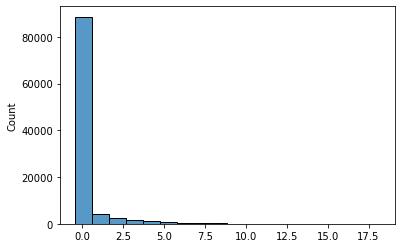

In [772]:
sns.histplot(Loss_distribution)
print("Mean of P/L Dist= "+str(Loss_distribution.mean()))
print("Std of P/L Dist= "+str(Loss_distribution.std()))
print("Maximum Gain = "+str((Loss_distribution.max())))
print("Maximum Loss = "+str((Loss_distribution.min())))

#### Comparing the portfolio to a portfolio of only one stock

Mean of P/L Dist= 0.0049545340505216815
Std of P/L Dist= 3.071179115015481
Maximum Gain = 21.255687805190497
Maximum Loss = -7.409873296315638


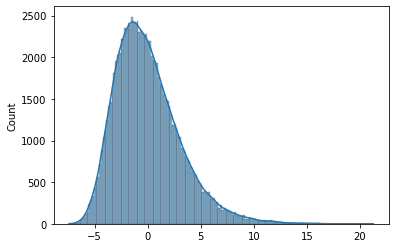

In [773]:
sns.histplot(St_last*np.exp(-r)-S0 ,kde =True)
print("Mean of P/L Dist= "+str(np.mean(St_last*np.exp(-r)-S0)))
print("Std of P/L Dist= "+str((St_last*np.exp(-r)-S0).std()))
print("Maximum Gain = "+str((St_last*np.exp(-r)-S0).max()))
print("Maximum Loss = "+str((St_last*np.exp(-r)-S0).min()))

#### Value at Risk and Expected shortfall

In [780]:
alpha = 0.05

In [781]:
# Portfolio1: Stock + Put Option

In [782]:
Loss_distribution_sorted = Loss_distribution

In [783]:
Loss_distribution_sorted.sort()

In [784]:
VaR = Loss_distribution_sorted[int(M*(alpha))]

In [785]:
VaR

In [786]:
ES = np.mean(Loss_distribution_sorted[:int(M*alpha)])

In [787]:
ES

In [788]:
# Portfolio: Stock

In [789]:
Stock_portfolio = (St_last*np.exp(-r)-S0)

In [790]:
Stock_portfolio_sorted = Stock_portfolio

In [791]:
Stock_portfolio_sorted.sort()

In [792]:
VaR_Stock = Stock_portfolio_sorted[int(M*(alpha))]

In [793]:
VaR_Stock

In [748]:
ES_Stock = np.mean(Stock_portfolio_sorted[:int(M*alpha)])

In [794]:
ES_Stock